In [2]:
import math
import os
import glob
import json
from PIL import Image
import cv2
import matplotlib.pyplot as plt
import numpy as np
from skimage.io import imread

In [3]:
image_path = '/home/aiffel-dj17/aiffel/siaiffel/DeepLabV3Plus-Pytorch-master/datasets/data/SIA/roads/leftImg8bit/val/BLD00002_PS3_K3A_NIA0276.png'

In [4]:
json_path = '/home/aiffel-dj17/aiffel/siaiffel/DeepLabV3Plus-Pytorch-master/datasets/roads_label_json_val/BLD00002_PS3_K3A_NIA0276.json'

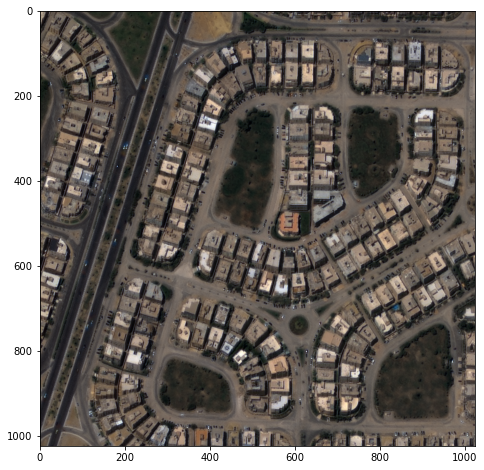

In [5]:
fig = plt.figure(figsize=(18, 8))

plt.subplot(1, 2, 1)
image = imread(image_path)
plt.imshow(image)


In [6]:
with open(json_path) as f:
    json_file = json.load(f)
    print(json.dumps(json_file, indent=2))

{
  "features": [
    {
      "geometry": {
        "coordinates": [
          [
            31.4405428056,
            30.0414645232,
            0.0
          ],
          [
            31.4463825091,
            30.0415336405,
            0.0
          ],
          [
            31.4463032058,
            30.0466143917,
            0.0
          ],
          [
            31.4404632046,
            30.0465452603,
            0.0
          ]
        ],
        "type": "Polygon"
      },
      "properties": {
        "object_imcoords": "EMPTY",
        "building_imcoords": "EMPTY",
        "road_imcoords": "288.6031466547639,0,0,919.8032354581876,0,993.8029311831228,294.79602019621916,43.8897481087173,305.52465442867833,57.317555659461206,318.7086591847022,67.36922874030383,322.0711818464676,56.243331055401704,310.4448355479495,45.7120934191754,303.1153876656694,33.33932789027563,303.76589398497424,16.669663945137813,309.3271413514083,0",
        "image_id": "BLD00002_PS3_K3A_NIA0276.

In [7]:
json_file.keys()

dict_keys(['features', 'type'])

In [8]:
for feature in json_file['features']:
    print(list(map(float, feature['properties']['building_imcoords'].split(','))))
    print(feature['properties']['type_id'])
    print(feature['properties']['type_name'])
    print(feature['properties']['image_id'])
    print('------------------')

ValueError: could not convert string to float: 'EMPTY'

In [12]:
label_dict = {}

In [13]:
def parse_json(json_file):
    polygon_list = []
    label_list = []
    for feature in json_file['features']:
        if feature['properties']['building_imcoords']:
            polygon = list(map(float, feature['properties']['road_imcoords'].split(',')))
            polygon = list(map(math.floor, polygon))
            polygon = np.array(polygon, np.int32).reshape(-1, 1, 2)
            polygon_list.append(polygon)
        
            label = int(feature['properties']['type_id'])
            label_list.append(label)
        
            if label not in label_dict:
                label_dict[label] = feature['properties']['type_name']
    
    return polygon_list, label_list

## Polygon 그리기

In [14]:
bg = np.zeros((1024, 1024, 3), np.uint8)

In [15]:
polygon_list, label_list = parse_json(json_file)

In [16]:
img = cv2.polylines(bg, polygon_list, True, (255, 255, 255))

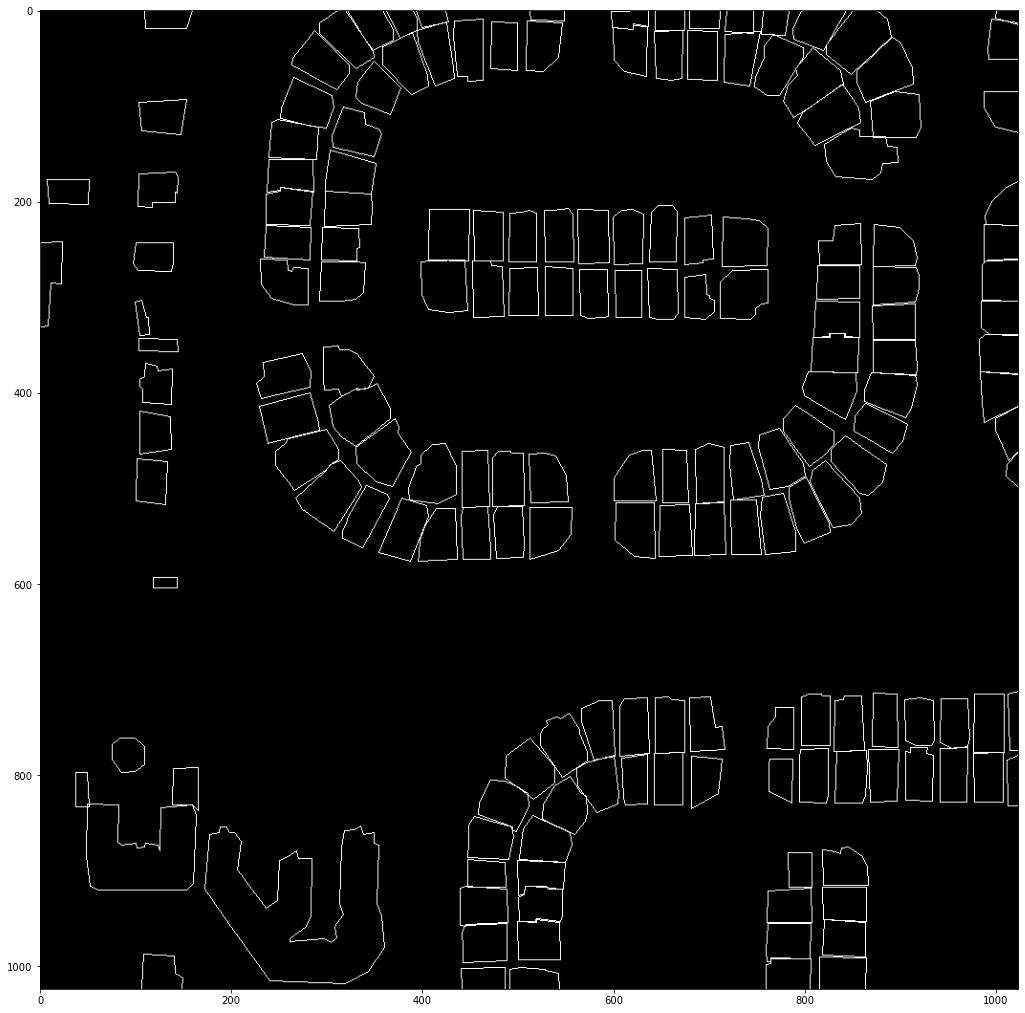

In [17]:
fig = plt.figure(figsize=(18, 18))
plt.imshow(img)

In [60]:
image_folder = '/home/aiffel-dj17/aiffel/siaiffel/DeepLabV3Plus-Pytorch-master/datasets/data/SIA/roads/leftImg8bit/val/'
label_folder = '/home/aiffel-dj17/aiffel/siaiffel/DeepLabV3Plus-Pytorch-master/datasets/roads_label_json_val'

In [61]:
import os

file_list = os.listdir(image_folder)
image_files = [file for file in file_list if file.endswith(".png")]

print ("file_list_py: {}".format(image_files))

file_list_py: ['BLD00242_PS3_K3A_NIA0276.png', 'BLD03532_PS3_K3A_NIA0376.png', 'BLD03444_PS3_K3A_NIA0376.png', 'BLD01004_PS3_K3A_NIA0277.png', 'BLD01548_PS3_K3A_NIA0373.png', 'BLD01232_PS3_K3A_NIA0373.png', 'BLD00811_PS3_K3A_NIA0277.png', 'BLD02224_PS3_K3A_NIA0374.png', 'BLD01545_PS3_K3A_NIA0373.png', 'BLD00031_PS3_K3A_NIA0276.png', 'BLD04402_PS3_K3A_NIA0378.png', 'BLD00174_PS3_K3A_NIA0276.png', 'BLD00770_PS3_K3A_NIA0277.png', 'OBJ04020_PS3_K3A_NIA0169.png', 'OBJ01226_PS3_K3_NIA0089.png', 'BLD00220_PS3_K3A_NIA0276.png', 'BLD02285_PS3_K3A_NIA0374.png', 'OBJ03150_PS3_K3_NIA0128.png', 'BLD03551_PS3_K3A_NIA0376.png', 'BLD00096_PS3_K3A_NIA0276.png', 'BLD10664_PS3_K3A_NIA0389.png', 'BLD00854_PS3_K3A_NIA0277.png', 'BLD01975_PS3_K3A_NIA0374.png', 'BLD00033_PS3_K3A_NIA0276.png', 'BLD00840_PS3_K3A_NIA0277.png', 'BLD01146_PS3_K3A_NIA0373.png', 'BLD00175_PS3_K3A_NIA0276.png', 'BLD00652_PS3_K3A_NIA0277.png', 'BLD02065_PS3_K3A_NIA0374.png', 'BLD04404_PS3_K3A_NIA0378.png', 'BLD02490_PS3_K3A_NIA0375.p

In [62]:
file_list = os.listdir(label_folder)
json_files = [file for file in file_list if file.endswith(".json")]

print ("file_list_py: {}".format(json_files))

file_list_py: ['BLD00242_PS3_K3A_NIA0276.json', 'BLD02499_PS3_K3A_NIA0375.json', 'BLD04051_PS3_K3A_NIA0377.json', 'BLD08377_PS3_K3A_NIA0384.json', 'BLD00710_PS3_K3A_NIA0277.json', 'BLD02274_PS3_K3A_NIA0374.json', 'OBJ03670_PS3_K3A_NIA0153.json', 'BLD00333_PS3_K3A_NIA0276.json', 'BLD01301_PS3_K3A_NIA0373.json', 'BLD01446_PS3_K3A_NIA0373.json', 'BLD01144_PS3_K3A_NIA0373.json', 'BLD01552_PS3_K3A_NIA0373.json', 'BLD00410_PS3_K3A_NIA0276.json', 'BLD02423_PS3_K3A_NIA0375.json', 'BLD00101_PS3_K3A_NIA0276.json', 'BLD00338_PS3_K3A_NIA0276.json', 'BLD01146_PS3_K3A_NIA0373.json', 'BLD00175_PS3_K3A_NIA0276.json', 'BLD00854_PS3_K3A_NIA0277.json', 'BLD10664_PS3_K3A_NIA0389.json', 'OBJ02974_PS3_K3_NIA0127.json', 'BLD00010_PS3_K3A_NIA0276.json', 'OBJ01050_PS3_K3_NIA0089.json', 'BLD00202_PS3_K3A_NIA0276.json', 'BLD02491_PS3_K3A_NIA0375.json', 'BLD00134_PS3_K3A_NIA0276.json', 'BLD00794_PS3_K3A_NIA0277.json', 'BLD00994_PS3_K3A_NIA0277.json', 'BLD06235_PS3_K3A_NIA0381.json', 'BLD01557_PS3_K3A_NIA0373.json

In [63]:
file_list = os.listdir(label_folder)
label_files = [file for file in file_list if file.endswith(".png")]

print ("file_list_py: {}".format(label_files))

file_list_py: ['BLD00242_PS3_K3A_NIA0276.png', 'BLD03532_PS3_K3A_NIA0376.png', 'BLD03444_PS3_K3A_NIA0376.png', 'BLD01004_PS3_K3A_NIA0277.png', 'BLD01548_PS3_K3A_NIA0373.png', 'BLD01232_PS3_K3A_NIA0373.png', 'BLD00811_PS3_K3A_NIA0277.png', 'BLD02224_PS3_K3A_NIA0374.png', 'BLD01545_PS3_K3A_NIA0373.png', 'BLD00031_PS3_K3A_NIA0276.png', 'BLD04402_PS3_K3A_NIA0378.png', 'BLD00174_PS3_K3A_NIA0276.png', 'BLD00770_PS3_K3A_NIA0277.png', 'OBJ04020_PS3_K3A_NIA0169.png', 'OBJ01226_PS3_K3_NIA0089.png', 'BLD00220_PS3_K3A_NIA0276.png', 'BLD02285_PS3_K3A_NIA0374.png', 'OBJ03150_PS3_K3_NIA0128.png', 'BLD03551_PS3_K3A_NIA0376.png', 'BLD00096_PS3_K3A_NIA0276.png', 'BLD10664_PS3_K3A_NIA0389.png', 'BLD00854_PS3_K3A_NIA0277.png', 'BLD01975_PS3_K3A_NIA0374.png', 'BLD00033_PS3_K3A_NIA0276.png', 'BLD00840_PS3_K3A_NIA0277.png', 'BLD01146_PS3_K3A_NIA0373.png', 'BLD00175_PS3_K3A_NIA0276.png', 'BLD00652_PS3_K3A_NIA0277.png', 'BLD02065_PS3_K3A_NIA0374.png', 'BLD04404_PS3_K3A_NIA0378.png', 'BLD02490_PS3_K3A_NIA0375.p

In [64]:
image_files.sort()
json_files.sort()
label_files.sort()

In [65]:
image_files

['BLD00007_PS3_K3A_NIA0276.png',
 'BLD00010_PS3_K3A_NIA0276.png',
 'BLD00031_PS3_K3A_NIA0276.png',
 'BLD00033_PS3_K3A_NIA0276.png',
 'BLD00048_PS3_K3A_NIA0276.png',
 'BLD00051_PS3_K3A_NIA0276.png',
 'BLD00054_PS3_K3A_NIA0276.png',
 'BLD00080_PS3_K3A_NIA0276.png',
 'BLD00084_PS3_K3A_NIA0276.png',
 'BLD00096_PS3_K3A_NIA0276.png',
 'BLD00101_PS3_K3A_NIA0276.png',
 'BLD00126_PS3_K3A_NIA0276.png',
 'BLD00134_PS3_K3A_NIA0276.png',
 'BLD00145_PS3_K3A_NIA0276.png',
 'BLD00148_PS3_K3A_NIA0276.png',
 'BLD00155_PS3_K3A_NIA0276.png',
 'BLD00174_PS3_K3A_NIA0276.png',
 'BLD00175_PS3_K3A_NIA0276.png',
 'BLD00201_PS3_K3A_NIA0276.png',
 'BLD00202_PS3_K3A_NIA0276.png',
 'BLD00220_PS3_K3A_NIA0276.png',
 'BLD00226_PS3_K3A_NIA0276.png',
 'BLD00236_PS3_K3A_NIA0276.png',
 'BLD00242_PS3_K3A_NIA0276.png',
 'BLD00248_PS3_K3A_NIA0276.png',
 'BLD00272_PS3_K3A_NIA0276.png',
 'BLD00283_PS3_K3A_NIA0276.png',
 'BLD00288_PS3_K3A_NIA0276.png',
 'BLD00309_PS3_K3A_NIA0276.png',
 'BLD00333_PS3_K3A_NIA0276.png',
 'BLD00338

In [66]:
json_files

['BLD00007_PS3_K3A_NIA0276.json',
 'BLD00010_PS3_K3A_NIA0276.json',
 'BLD00031_PS3_K3A_NIA0276.json',
 'BLD00033_PS3_K3A_NIA0276.json',
 'BLD00048_PS3_K3A_NIA0276.json',
 'BLD00051_PS3_K3A_NIA0276.json',
 'BLD00054_PS3_K3A_NIA0276.json',
 'BLD00080_PS3_K3A_NIA0276.json',
 'BLD00084_PS3_K3A_NIA0276.json',
 'BLD00096_PS3_K3A_NIA0276.json',
 'BLD00101_PS3_K3A_NIA0276.json',
 'BLD00126_PS3_K3A_NIA0276.json',
 'BLD00134_PS3_K3A_NIA0276.json',
 'BLD00145_PS3_K3A_NIA0276.json',
 'BLD00148_PS3_K3A_NIA0276.json',
 'BLD00155_PS3_K3A_NIA0276.json',
 'BLD00174_PS3_K3A_NIA0276.json',
 'BLD00175_PS3_K3A_NIA0276.json',
 'BLD00201_PS3_K3A_NIA0276.json',
 'BLD00202_PS3_K3A_NIA0276.json',
 'BLD00220_PS3_K3A_NIA0276.json',
 'BLD00226_PS3_K3A_NIA0276.json',
 'BLD00236_PS3_K3A_NIA0276.json',
 'BLD00242_PS3_K3A_NIA0276.json',
 'BLD00248_PS3_K3A_NIA0276.json',
 'BLD00272_PS3_K3A_NIA0276.json',
 'BLD00283_PS3_K3A_NIA0276.json',
 'BLD00288_PS3_K3A_NIA0276.json',
 'BLD00309_PS3_K3A_NIA0276.json',
 'BLD00333_PS3

In [67]:
label_dict = {}

In [68]:
def parse_json(json_file):
    polygon_list = []
    label_list = []
    for feature in json_file['features']:
        if feature['properties']['building_imcoords']:
            polygon = list(map(float, feature['properties']['road_imcoords'].split(',')))
            polygon = list(map(math.floor, polygon))
            polygon = np.array(polygon, np.int32).reshape(-1, 1, 2)
            polygon_list.append(polygon)
        
            label = int(feature['properties']['type_id'])
            label_list.append(label)
        
            if label not in label_dict:
                label_dict[label] = feature['properties']['type_name']
    
    return polygon_list, label_list

In [69]:
def show_label(image_path, label_path, polygon_list):
        fig = plt.figure(figsize=(18, 8))
        plt.subplot(1, 2, 1)
        # image = imread(image_path)
        image = np.zeros((1024, 1024, 3), np.uint8)
        # img = cv2.polylines(image, polygon_list, True, (255, 255, 255))
        img = cv2.fillPoly(image, polygon_list, (255, 255, 255))
        plt.imshow(img)
        plt.subplot(1, 2, 2)
        image_label = imread(label_path)
        plt.imshow(image_label)

In [75]:
def draw_label(image_path, polygon_list):
        filename = os.path.splitext(os.path.basename(image_path))[0]
        savepath = '/home/aiffel-dj17/aiffel/siaiffel/DeepLabV3Plus-Pytorch-master/datasets/data/building_csv/png_val_road/'
        # image = imread(image_path)
        image = np.zeros((1024, 1024, 3), np.uint8)
        # img = cv2.polylines(image, polygon_list, True, (255, 255, 255))
        img = cv2.fillPoly(image, polygon_list, (255, 255, 255))
        img = Image.fromarray(img)
        img.save(f'{savepath}{filename}.png')
        print(f'{savepath}{filename}.png saved!')

In [76]:
def check_filename(file_path):
    print(os.path.splitext(os.path.basename(file_path))[0])
    return os.path.splitext(os.path.basename(file_path))[0]

In [77]:
for i in range(len(image_files)):
    image_path = image_files[i]
    json_path = json_files[i]
    if check_filename(image_path) == check_filename(json_path):
        json_path = label_folder + json_path
        with open(json_path) as f:
            json_file = json.load(f)
            polygon_list, label_list = parse_json(json_file)
            # show_label(image_path, label_path, polygon_list)
            draw_label(image_path, polygon_list)
    else:
        print("filename Different!")

BLD00007_PS3_K3A_NIA0276
BLD00007_PS3_K3A_NIA0276
BLD00007_PS3_K3A_NIA0276
<_io.TextIOWrapper name='/home/aiffel-dj17/aiffel/siaiffel/DeepLabV3Plus-Pytorch-master/datasets/data/SIA/buildings/gtFine/val/BLD00007_PS3_K3A_NIA0276.json' mode='r' encoding='UTF-8'>
1
/home/aiffel-dj17/aiffel/siaiffel/DeepLabV3Plus-Pytorch-master/datasets/data/building_csv/png/BLD00007_PS3_K3A_NIA0276.png saved!
BLD00010_PS3_K3A_NIA0276
BLD00010_PS3_K3A_NIA0276
BLD00010_PS3_K3A_NIA0276
<_io.TextIOWrapper name='/home/aiffel-dj17/aiffel/siaiffel/DeepLabV3Plus-Pytorch-master/datasets/data/SIA/buildings/gtFine/val/BLD00010_PS3_K3A_NIA0276.json' mode='r' encoding='UTF-8'>
2
/home/aiffel-dj17/aiffel/siaiffel/DeepLabV3Plus-Pytorch-master/datasets/data/building_csv/png/BLD00010_PS3_K3A_NIA0276.png saved!
BLD00031_PS3_K3A_NIA0276
BLD00031_PS3_K3A_NIA0276
BLD00031_PS3_K3A_NIA0276
<_io.TextIOWrapper name='/home/aiffel-dj17/aiffel/siaiffel/DeepLabV3Plus-Pytorch-master/datasets/data/SIA/buildings/gtFine/val/BLD00031_PS3_K

/home/aiffel-dj17/aiffel/siaiffel/DeepLabV3Plus-Pytorch-master/datasets/data/building_csv/png/BLD00226_PS3_K3A_NIA0276.png saved!
BLD00236_PS3_K3A_NIA0276
BLD00236_PS3_K3A_NIA0276
BLD00236_PS3_K3A_NIA0276
<_io.TextIOWrapper name='/home/aiffel-dj17/aiffel/siaiffel/DeepLabV3Plus-Pytorch-master/datasets/data/SIA/buildings/gtFine/val/BLD00236_PS3_K3A_NIA0276.json' mode='r' encoding='UTF-8'>
23
/home/aiffel-dj17/aiffel/siaiffel/DeepLabV3Plus-Pytorch-master/datasets/data/building_csv/png/BLD00236_PS3_K3A_NIA0276.png saved!
BLD00242_PS3_K3A_NIA0276
BLD00242_PS3_K3A_NIA0276
BLD00242_PS3_K3A_NIA0276
<_io.TextIOWrapper name='/home/aiffel-dj17/aiffel/siaiffel/DeepLabV3Plus-Pytorch-master/datasets/data/SIA/buildings/gtFine/val/BLD00242_PS3_K3A_NIA0276.json' mode='r' encoding='UTF-8'>
24
/home/aiffel-dj17/aiffel/siaiffel/DeepLabV3Plus-Pytorch-master/datasets/data/building_csv/png/BLD00242_PS3_K3A_NIA0276.png saved!
BLD00248_PS3_K3A_NIA0276
BLD00248_PS3_K3A_NIA0276
BLD00248_PS3_K3A_NIA0276
<_io.Text

/home/aiffel-dj17/aiffel/siaiffel/DeepLabV3Plus-Pytorch-master/datasets/data/building_csv/png/BLD00769_PS3_K3A_NIA0277.png saved!
BLD00770_PS3_K3A_NIA0277
BLD00770_PS3_K3A_NIA0277
BLD00770_PS3_K3A_NIA0277
<_io.TextIOWrapper name='/home/aiffel-dj17/aiffel/siaiffel/DeepLabV3Plus-Pytorch-master/datasets/data/SIA/buildings/gtFine/val/BLD00770_PS3_K3A_NIA0277.json' mode='r' encoding='UTF-8'>
46
/home/aiffel-dj17/aiffel/siaiffel/DeepLabV3Plus-Pytorch-master/datasets/data/building_csv/png/BLD00770_PS3_K3A_NIA0277.png saved!
BLD00793_PS3_K3A_NIA0277
BLD00793_PS3_K3A_NIA0277
BLD00793_PS3_K3A_NIA0277
<_io.TextIOWrapper name='/home/aiffel-dj17/aiffel/siaiffel/DeepLabV3Plus-Pytorch-master/datasets/data/SIA/buildings/gtFine/val/BLD00793_PS3_K3A_NIA0277.json' mode='r' encoding='UTF-8'>
47
/home/aiffel-dj17/aiffel/siaiffel/DeepLabV3Plus-Pytorch-master/datasets/data/building_csv/png/BLD00793_PS3_K3A_NIA0277.png saved!
BLD00794_PS3_K3A_NIA0277
BLD00794_PS3_K3A_NIA0277
BLD00794_PS3_K3A_NIA0277
<_io.Text

/home/aiffel-dj17/aiffel/siaiffel/DeepLabV3Plus-Pytorch-master/datasets/data/building_csv/png/BLD01071_PS3_K3A_NIA0277.png saved!
BLD01125_PS3_K3A_NIA0277
BLD01125_PS3_K3A_NIA0277
BLD01125_PS3_K3A_NIA0277
<_io.TextIOWrapper name='/home/aiffel-dj17/aiffel/siaiffel/DeepLabV3Plus-Pytorch-master/datasets/data/SIA/buildings/gtFine/val/BLD01125_PS3_K3A_NIA0277.json' mode='r' encoding='UTF-8'>
70
/home/aiffel-dj17/aiffel/siaiffel/DeepLabV3Plus-Pytorch-master/datasets/data/building_csv/png/BLD01125_PS3_K3A_NIA0277.png saved!
BLD01141_PS3_K3A_NIA0277
BLD01141_PS3_K3A_NIA0277
BLD01141_PS3_K3A_NIA0277
<_io.TextIOWrapper name='/home/aiffel-dj17/aiffel/siaiffel/DeepLabV3Plus-Pytorch-master/datasets/data/SIA/buildings/gtFine/val/BLD01141_PS3_K3A_NIA0277.json' mode='r' encoding='UTF-8'>
71
/home/aiffel-dj17/aiffel/siaiffel/DeepLabV3Plus-Pytorch-master/datasets/data/building_csv/png/BLD01141_PS3_K3A_NIA0277.png saved!
BLD01144_PS3_K3A_NIA0373
BLD01144_PS3_K3A_NIA0373
BLD01144_PS3_K3A_NIA0373
<_io.Text

/home/aiffel-dj17/aiffel/siaiffel/DeepLabV3Plus-Pytorch-master/datasets/data/building_csv/png/BLD01862_PS3_K3A_NIA0374.png saved!
BLD01975_PS3_K3A_NIA0374
BLD01975_PS3_K3A_NIA0374
BLD01975_PS3_K3A_NIA0374
<_io.TextIOWrapper name='/home/aiffel-dj17/aiffel/siaiffel/DeepLabV3Plus-Pytorch-master/datasets/data/SIA/buildings/gtFine/val/BLD01975_PS3_K3A_NIA0374.json' mode='r' encoding='UTF-8'>
94
/home/aiffel-dj17/aiffel/siaiffel/DeepLabV3Plus-Pytorch-master/datasets/data/building_csv/png/BLD01975_PS3_K3A_NIA0374.png saved!
BLD02014_PS3_K3A_NIA0374
BLD02014_PS3_K3A_NIA0374
BLD02014_PS3_K3A_NIA0374
<_io.TextIOWrapper name='/home/aiffel-dj17/aiffel/siaiffel/DeepLabV3Plus-Pytorch-master/datasets/data/SIA/buildings/gtFine/val/BLD02014_PS3_K3A_NIA0374.json' mode='r' encoding='UTF-8'>
95
/home/aiffel-dj17/aiffel/siaiffel/DeepLabV3Plus-Pytorch-master/datasets/data/building_csv/png/BLD02014_PS3_K3A_NIA0374.png saved!
BLD02065_PS3_K3A_NIA0374
BLD02065_PS3_K3A_NIA0374
BLD02065_PS3_K3A_NIA0374
<_io.Text

/home/aiffel-dj17/aiffel/siaiffel/DeepLabV3Plus-Pytorch-master/datasets/data/building_csv/png/BLD03444_PS3_K3A_NIA0376.png saved!
BLD03532_PS3_K3A_NIA0376
BLD03532_PS3_K3A_NIA0376
BLD03532_PS3_K3A_NIA0376
<_io.TextIOWrapper name='/home/aiffel-dj17/aiffel/siaiffel/DeepLabV3Plus-Pytorch-master/datasets/data/SIA/buildings/gtFine/val/BLD03532_PS3_K3A_NIA0376.json' mode='r' encoding='UTF-8'>
121
/home/aiffel-dj17/aiffel/siaiffel/DeepLabV3Plus-Pytorch-master/datasets/data/building_csv/png/BLD03532_PS3_K3A_NIA0376.png saved!
BLD03551_PS3_K3A_NIA0376
BLD03551_PS3_K3A_NIA0376
BLD03551_PS3_K3A_NIA0376
<_io.TextIOWrapper name='/home/aiffel-dj17/aiffel/siaiffel/DeepLabV3Plus-Pytorch-master/datasets/data/SIA/buildings/gtFine/val/BLD03551_PS3_K3A_NIA0376.json' mode='r' encoding='UTF-8'>
122
/home/aiffel-dj17/aiffel/siaiffel/DeepLabV3Plus-Pytorch-master/datasets/data/building_csv/png/BLD03551_PS3_K3A_NIA0376.png saved!
BLD03693_PS3_K3A_NIA0376
BLD03693_PS3_K3A_NIA0376
BLD03693_PS3_K3A_NIA0376
<_io.Te

/home/aiffel-dj17/aiffel/siaiffel/DeepLabV3Plus-Pytorch-master/datasets/data/building_csv/png/BLD11632_PS3_K3A_NIA0390.png saved!
BLD11633_PS3_K3A_NIA0390
BLD11633_PS3_K3A_NIA0390
BLD11633_PS3_K3A_NIA0390
<_io.TextIOWrapper name='/home/aiffel-dj17/aiffel/siaiffel/DeepLabV3Plus-Pytorch-master/datasets/data/SIA/buildings/gtFine/val/BLD11633_PS3_K3A_NIA0390.json' mode='r' encoding='UTF-8'>
142
/home/aiffel-dj17/aiffel/siaiffel/DeepLabV3Plus-Pytorch-master/datasets/data/building_csv/png/BLD11633_PS3_K3A_NIA0390.png saved!
BLD12346_PS3_K3A_NIA0391
BLD12346_PS3_K3A_NIA0391
BLD12346_PS3_K3A_NIA0391
<_io.TextIOWrapper name='/home/aiffel-dj17/aiffel/siaiffel/DeepLabV3Plus-Pytorch-master/datasets/data/SIA/buildings/gtFine/val/BLD12346_PS3_K3A_NIA0391.json' mode='r' encoding='UTF-8'>
143
/home/aiffel-dj17/aiffel/siaiffel/DeepLabV3Plus-Pytorch-master/datasets/data/building_csv/png/BLD12346_PS3_K3A_NIA0391.png saved!
OBJ00176_PS3_K3_NIA0081
OBJ00176_PS3_K3_NIA0081
OBJ00176_PS3_K3_NIA0081
<_io.TextI

In [ ]:
len(image_files)